**Author:** Thomas Lane, Zhanyuan Zhang  
**Purpose:** This script help calculate the false discovery rate and the C-statistics of a binary classification model.  
**Usage:** User needs to input the names of the model and its weights. Since all models should be saved in the *models* folder, this script by default imports model from that folder.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from utility import load_model

In [2]:
# Input the name of the model and its weights
model_name = "toy_model"
model_weights = "toy_model_weights"

# Generate the path of the model and its weights
model_path = "../models/" + model_name + ".json"
weights_path = "../models/" + model_weights + ".h5"

In [3]:
model = load_model(model_path, weights_path)

Loaded model from ../models/toy_model.json


Using TensorFlow backend.


**Before we calculate the FDR and C-statistics, we need to generate or import the input data and the correct labels**

In [4]:
x_train = np.random.random((1000, 100))
y_train = np.random.randint(2, size=(1000, 1))

# False Discovery Rate
This cell uses the model to make predictions on our data.

Then it iterates through the results and the real labels and compares them to check for False Positives(FP) and True Positives(TP).

Then it uses the formula to calculate the False Discovery Rate (FDR)

In [7]:
results = model.predict(x_train, batch_size=16)

false_positives = 0
true_positives = 0
total_negatives = 0
total_positives = 0
true_negatives = 0

for i in range(0,results.size):
    
    if results[i][0]>=0.5 and y_train[i]==0:
        false_positives += 1

    if results[i][0]>=0.5 and y_train[i]==1:
        true_positives += 1
        
    if results[i][0]<=0.5 and y_train[i]==0:
        true_negatives += 1
        
    if results[i][0] <= 0.5:
        total_negatives += 1
        
    if results[i][0] >= 0.5:
        total_positives += 1

false_discovery_rate = false_positives/(false_positives + true_positives)
print("The false discovery rate is: {}".format(false_discovery_rate))

The false discovery rate is: 0.5198776758409785


# C-statistics
This cell iterates through the data using an incrementing threshold value to generate an ROC Curve then uses a Riemann sum (trapezoidal) to generate the C-statistic

ROC Curve


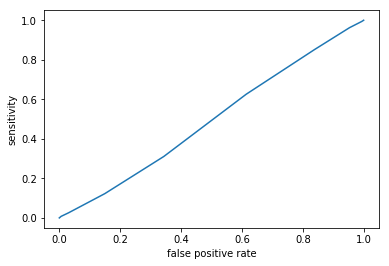

c-statistic = 0.49374137413741376


In [8]:
sensitivities = []
false_positive_rates =[]
discovery_percentage = 0.05

while discovery_percentage < 1.0:
    
    false_positives = 0
    true_positives = 0
    total_negatives = 0
    total_positives = 0
    true_negatives = 0
    
    for i in range(0,results.size):

        if results[i][0]>=discovery_percentage and y_train[i]==0:
            false_positives += 1

        if results[i][0]>=discovery_percentage and y_train[i]==1:
            true_positives += 1

        if results[i][0]<=discovery_percentage and y_train[i]==0:
            true_negatives += 1

        if y_train[i]==0:
            total_negatives += 1

        if y_train[i]==1:
            total_positives += 1
            
    if total_positives != 0 and total_negatives != 0:
        sensitivities.append(true_positives / total_positives)
        false_positive_rates.append(1-(true_negatives / total_negatives))
    
    discovery_percentage += 0.05
    
riemann = 0.0
for i in range(0,len(sensitivities) - 1):
    riemann += 0.5 * (sensitivities[i]+sensitivities[i+1]) * (false_positive_rates[i]-false_positive_rates[i+1])
    

print("ROC Curve")
plt.plot(false_positive_rates, sensitivities )
plt.ylabel('sensitivity')
plt.xlabel('false positive rate')
plt.show()
print("c-statistic = " + str(riemann))